<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Image_Classification_with_Transfer_Learning(Ass_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Samikshya Sanskruti**

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, ResNet50, VGG16, MobileNetV2, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Split into training and validation
val_split = 0.2
val_size = int(len(x_train) * val_split)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]


In [5]:
# Define a function to create models
def create_model(base_model):
    base_model.trainable = False  # Freeze the base model layers
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Resizing(224, 224)(inputs)  # Resize for pre-trained models
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [6]:
# List of models
models = {
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False),
    "ResNet50": ResNet50(weights='imagenet', include_top=False),
    "VGG16": VGG16(weights='imagenet', include_top=False),
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False),
    "Xception": Xception(weights='imagenet', include_top=False)
}

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/tmp/ipython-input-6-2729578195.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
trained_models = {}
history_dict = {}

In [11]:
# Training parameters
epochs = 2 # Increased the number of epochs for better learning atlest do with 10
batch_size = 32
learning_rate = 1e-4  # Added a learning rate
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)] # Added restore_best_weights

# Train each model
for name, base in models.items():
    print(f"Training {name}...")
    model = create_model(base)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) # Added learning_rate
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    trained_models[name] = model
    history_dict[name] = history

Training InceptionV3...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 96ms/step - accuracy: 0.6957 - loss: 0.9266 - val_accuracy: 0.8227 - val_loss: 0.5228
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 77ms/step - accuracy: 0.8305 - loss: 0.4938 - val_accuracy: 0.8314 - val_loss: 0.5030
Training ResNet50...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.1173 - loss: 2.3162 - val_accuracy: 0.1646 - val_loss: 2.2633
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.1636 - loss: 2.2589 - val_accuracy: 0.1643 - val_loss: 2.2278
Training VGG16...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 313s 239ms/step - accuracy: 0.2870 - loss: 2.1370 - val_accuracy: 0.4441 - val_loss: 1.7716
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 308s 238ms/step - accuracy: 0.4396 - loss: 1.7100 - val_accuracy: 0.4796 - val_loss: 1.5924
Training MobileNetV2...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.6383 - loss: 1.0792 - val_accuracy: 0.7838 - val

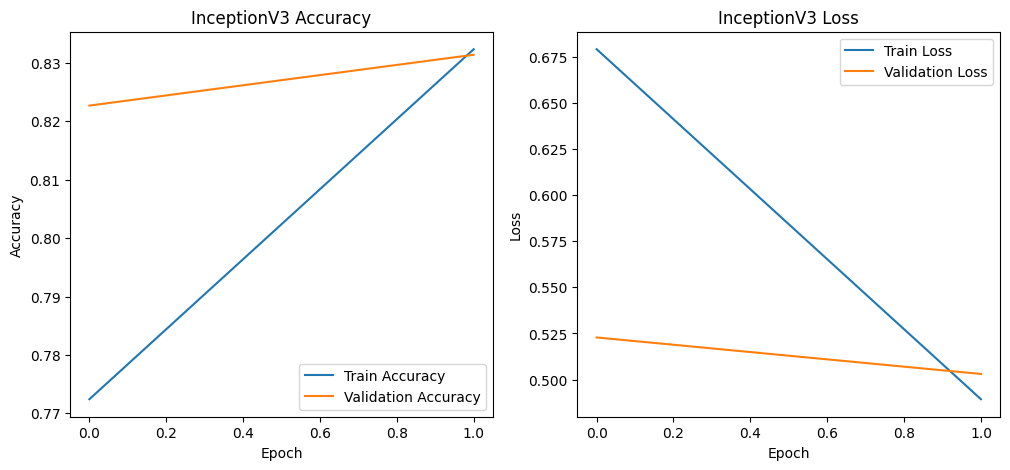

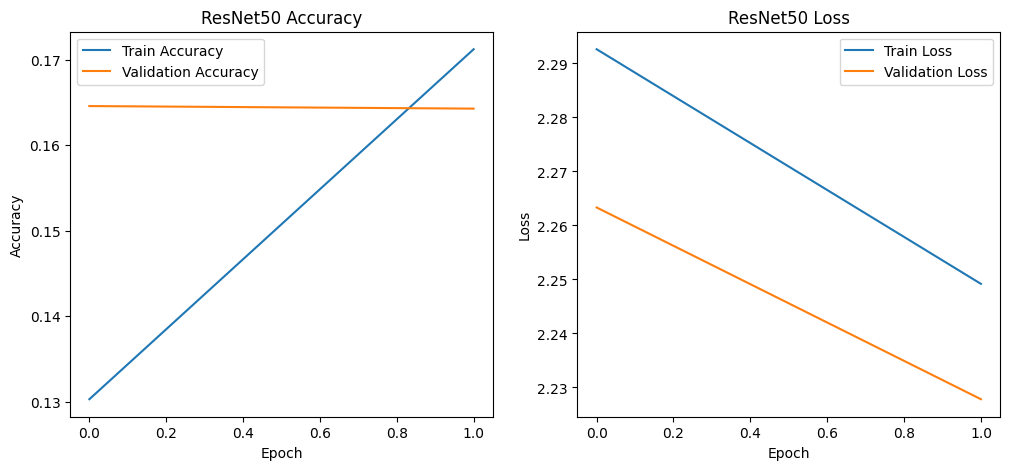

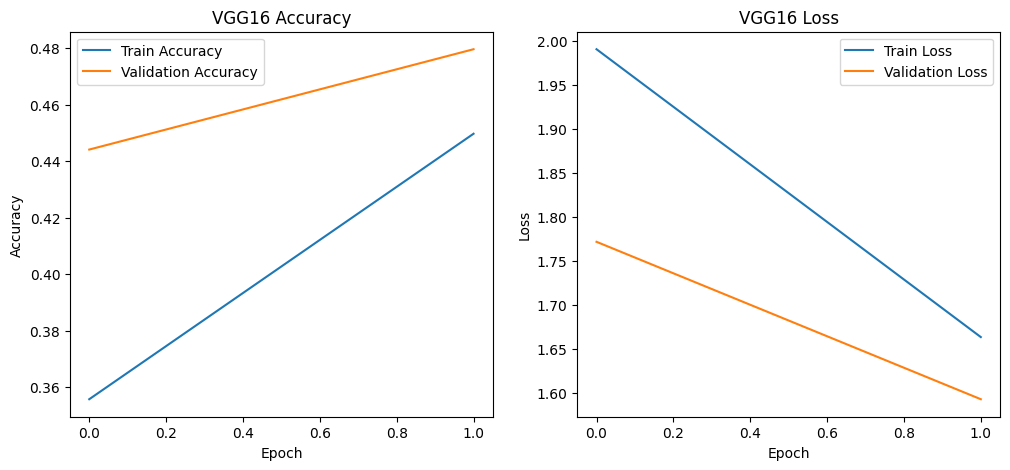

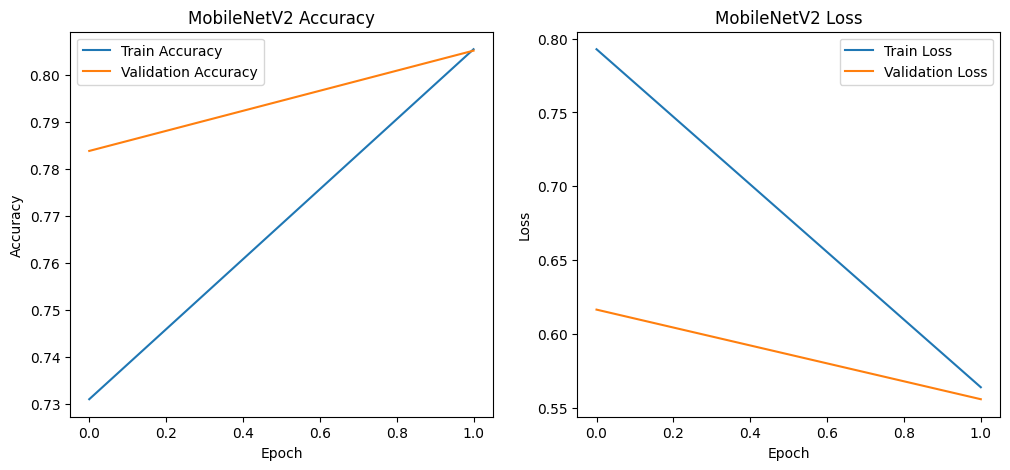

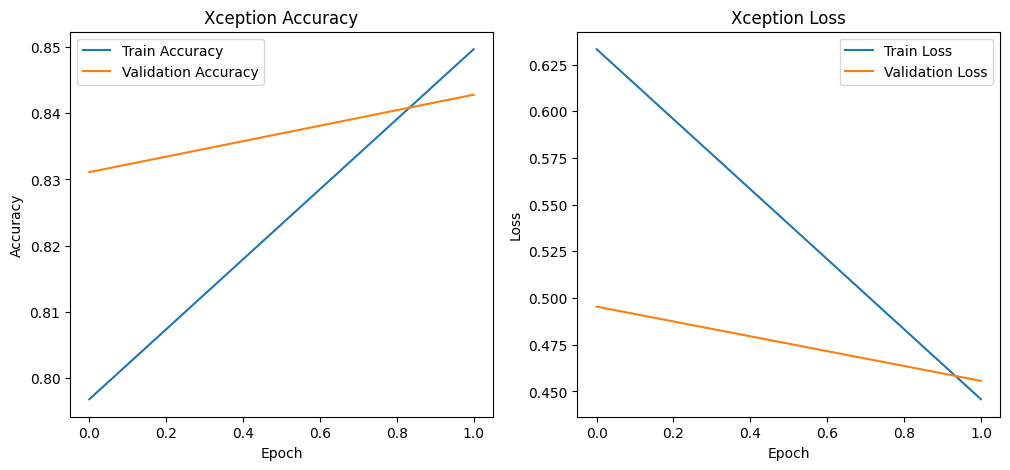

In [12]:
# Plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

for name, history in history_dict.items():
    plot_history(history, name)

In [13]:
# Evaluate and generate classification reports
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Added verbose=0 to reduce output
    print(f"{name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))


Evaluating InceptionV3...
InceptionV3 - Test Loss: 0.5236, Test Accuracy: 0.8226
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.88      0.92      0.90      1000
           2       0.85      0.73      0.79      1000
           3       0.72      0.71      0.71      1000
           4       0.77      0.79      0.78      1000
           5       0.87      0.74      0.80      1000
           6       0.74      0.91      0.82      1000
           7       0.88      0.83      0.86      1000
           8       0.83      0.89      0.86      1000
           9       0.84      0.90      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Evaluating ResNet50...
ResNet50 - Test Loss: 2.2313, Test Accuracy: 0.1638
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.18      0.15      0.16      1000
           1       0.33      0.26      0.29      1000
           2       0.00      0.00      0.00      1000
           3       0.22      0.09      0.13      1000
           4       0.00      0.00      0.00      1000
           5       0.46      0.02      0.03      1000
           6       0.00      0.00      0.00      1000
           7       0.39      0.15      0.22      1000
           8       0.12      0.86      0.21      1000
           9       0.33      0.11      0.17      1000

    accuracy                           0.16     10000
   macro avg       0.20      0.16      0.12     10000
weighted avg       0.20      0.16      0.12     10000

Evaluating VGG16...
VGG16 - Test Loss: 1.5912, Test Accuracy: 0.4779
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 174ms/step
              precision    recall  f1-score   support

           0       0.52      0.62      0.57      1000
           1       

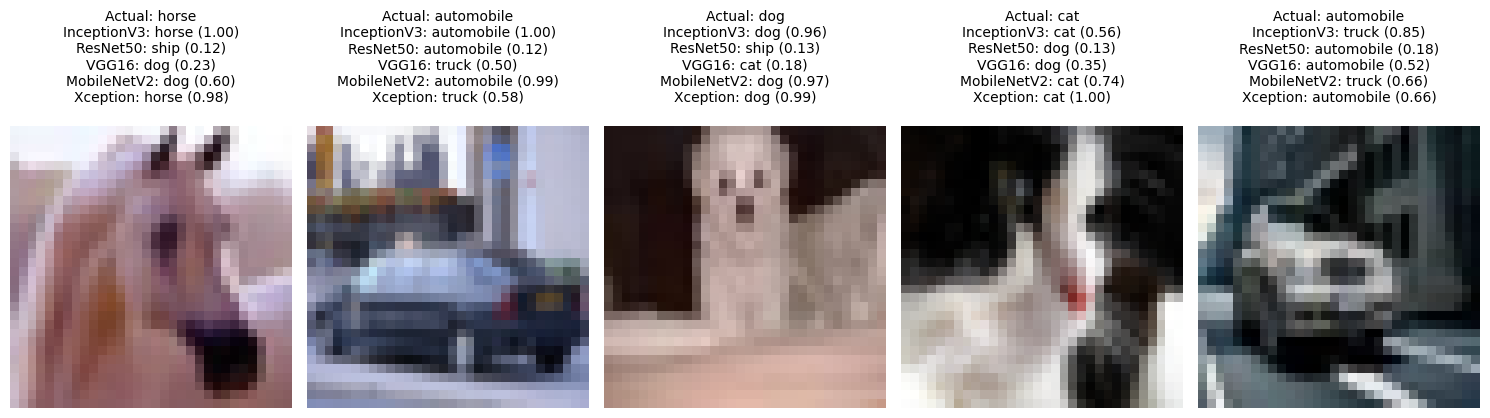

In [14]:
# Predict and visualize results
sample_indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # Added class names for better labels

plt.figure(figsize=(15, 3 * len(trained_models))) # Adjusted figure size for multiple model predictions
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
    title = f"Actual: {class_names[sample_labels[i]]}\n"
    for j, (name, model) in enumerate(trained_models.items()):
        pred_probs = model.predict(sample_images[i:i+1], verbose=0) # Added verbose=0
        predicted_class = np.argmax(pred_probs)
        title += f"{name}: {class_names[predicted_class]} ({pred_probs[0][predicted_class]:.2f})\n"
    plt.title(title, fontsize=10)
plt.tight_layout()
plt.show()